# Fashion Project!

This notebook is to explore the Fashion Product Images Dataset.

In [1]:
import os
import numpy as np
import pandas as pd


In [2]:
d = os.path.dirname(os.path.dirname(os.path.abspath('')))
print(d)

/home


In [3]:
d = d + "/j2ko/"

In [12]:
styles_df = pd.read_csv(d + 'fashion-dataset/styles.csv', on_bad_lines='skip')
styles_df.head()

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt


In [13]:
styles_df[styles_df['gender'] == 'Men']['usage'].value_counts()

Casual          16769
Sports           2954
Formal           2235
Ethnic            107
Smart Casual       54
Party               2
Travel              2
Name: usage, dtype: int64

In [5]:
N_PICS = 200

In [14]:
color_count = styles_df['baseColour'].value_counts()
article_count = styles_df['articleType'].value_counts()

In [15]:
to_remove_color = color_count[color_count <= 200].index
to_remove_article = article_count[article_count <= 200].index

filtered_df = styles_df[(~styles_df['baseColour'].isin(to_remove_color)) & (~styles_df['articleType'].isin(to_remove_article))]
filtered_df['articleType'].value_counts()

Tshirts                  6870
Shirts                   3160
Casual Shoes             2753
Watches                  2504
Sports Shoes             2030
Kurtas                   1714
Handbags                 1658
Tops                     1600
Heels                    1243
Sunglasses               1008
Flip Flops                904
Wallets                   896
Sandals                   861
Belts                     787
Briefs                    763
Backpacks                 720
Socks                     682
Formal Shoes              620
Jeans                     606
Perfume and Body Mist     595
Shorts                    529
Trousers                  496
Flats                     473
Dresses                   433
Earrings                  410
Bra                       400
Sarees                    389
Deodorant                 340
Track Pants               295
Caps                      281
Sweatshirts               279
Lipstick                  277
Nail Polish               273
Sweaters  

In [17]:
filtered_df['image'] = filtered_df.apply(lambda row: str(row['id']) + ".jpg", axis=1)
filtered_df

/tmp/ipykernel_235/3390442019.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['image'] = filtered_df.apply(lambda row: str(row['id']) + ".jpg", axis=1)


,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,image
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt,15970.jpg
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans,39386.jpg
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch,59263.jpg
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants,21379.jpg
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt,53759.jpg
...,...,...,...,...,...,...,...,...,...,...,...
44419,17036,Men,Footwear,Shoes,Casual Shoes,White,Summer,2013.0,Casual,Gas Men Caddy Casual Shoe,17036.jpg
44420,6461,Men,Footwear,Flip Flops,Flip Flops,Red,Summer,2011.0,Casual,Lotto Men's Soccer Track Flip Flop,6461.jpg
44421,18842,Men,Apparel,Topwear,Tshirts,Blue,Fall,2011.0,Casual,Puma Men Graphic Stellar Blue Tshirt,18842.jpg
44422,46694,Women,Personal Care,Fragrance,Perfume and Body Mist,Blue,Spring,2017.0,Casual,Rasasi Women Blue Lady Perfume,46694.jpg


In [18]:
new_df = filtered_df[['gender', 'articleType', 'baseColour', 'image']]
new_df = new_df.dropna()

In [19]:
new_df

,gender,articleType,baseColour,image
0,Men,Shirts,Navy Blue,15970.jpg
1,Men,Jeans,Blue,39386.jpg
2,Women,Watches,Silver,59263.jpg
3,Men,Track Pants,Black,21379.jpg
4,Men,Tshirts,Grey,53759.jpg
...,...,...,...,...
44419,Men,Casual Shoes,White,17036.jpg
44420,Men,Flip Flops,Red,6461.jpg
44421,Men,Tshirts,Blue,18842.jpg
44422,Women,Perfume and Body Mist,Blue,46694.jpg


In [28]:
new_df.to_csv('filtered_df.csv', index=False)

In [4]:
new_df = pd.read_csv('filtered_df.csv')
new_df

,gender,articleType,baseColour,image
0,Men,Shirts,Navy Blue,15970.jpg
1,Men,Jeans,Blue,39386.jpg
2,Women,Watches,Silver,59263.jpg
3,Men,Track Pants,Black,21379.jpg
4,Men,Tshirts,Grey,53759.jpg
...,...,...,...,...
38527,Men,Casual Shoes,White,17036.jpg
38528,Men,Flip Flops,Red,6461.jpg
38529,Men,Tshirts,Blue,18842.jpg
38530,Women,Perfume and Body Mist,Blue,46694.jpg


In [5]:
len(new_df['baseColour'].value_counts())

21

In [6]:
translation_dict = dict(zip(new_df['image'], list(zip(new_df['gender'], new_df['articleType'], new_df['baseColour']))))
translation_dict

{'15970.jpg': ('Men', 'Shirts', 'Navy Blue'),
 '39386.jpg': ('Men', 'Jeans', 'Blue'),
 '59263.jpg': ('Women', 'Watches', 'Silver'),
 '21379.jpg': ('Men', 'Track Pants', 'Black'),
 '53759.jpg': ('Men', 'Tshirts', 'Grey'),
 '1855.jpg': ('Men', 'Tshirts', 'Grey'),
 '30805.jpg': ('Men', 'Shirts', 'Green'),
 '26960.jpg': ('Women', 'Shirts', 'Purple'),
 '29114.jpg': ('Men', 'Socks', 'Navy Blue'),
 '30039.jpg': ('Men', 'Watches', 'Black'),
 '9204.jpg': ('Men', 'Casual Shoes', 'Black'),
 '48123.jpg': ('Women', 'Belts', 'Black'),
 '18653.jpg': ('Men', 'Flip Flops', 'Black'),
 '47957.jpg': ('Women', 'Handbags', 'Blue'),
 '46885.jpg': ('Boys', 'Flip Flops', 'Navy Blue'),
 '12369.jpg': ('Men', 'Shirts', 'Purple'),
 '29928.jpg': ('Men', 'Watches', 'Black'),
 '42419.jpg': ('Girls', 'Tops', 'White'),
 '51832.jpg': ('Women', 'Bra', 'Beige'),
 '47359.jpg': ('Women', 'Handbags', 'Brown'),
 '17429.jpg': ('Men', 'Watches', 'Black'),
 '12967.jpg': ('Men', 'Sandals', 'Black'),
 '13089.jpg': ('Men', 'Sweatsh


Split into train and test

In [22]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(new_df, test_size = 0.1)

In [23]:
train, val = train_test_split(train, test_size = 0.11)

In [7]:
from sklearn.preprocessing import OrdinalEncoder

enc = OrdinalEncoder()


list(translation_dict.values())
array_form_values = list(list(value) for value in translation_dict.values())
array_form_values

[['Men', 'Shirts', 'Navy Blue'],
 ['Men', 'Jeans', 'Blue'],
 ['Women', 'Watches', 'Silver'],
 ['Men', 'Track Pants', 'Black'],
 ['Men', 'Tshirts', 'Grey'],
 ['Men', 'Tshirts', 'Grey'],
 ['Men', 'Shirts', 'Green'],
 ['Women', 'Shirts', 'Purple'],
 ['Men', 'Socks', 'Navy Blue'],
 ['Men', 'Watches', 'Black'],
 ['Men', 'Casual Shoes', 'Black'],
 ['Women', 'Belts', 'Black'],
 ['Men', 'Flip Flops', 'Black'],
 ['Women', 'Handbags', 'Blue'],
 ['Boys', 'Flip Flops', 'Navy Blue'],
 ['Men', 'Shirts', 'Purple'],
 ['Men', 'Watches', 'Black'],
 ['Girls', 'Tops', 'White'],
 ['Women', 'Bra', 'Beige'],
 ['Women', 'Handbags', 'Brown'],
 ['Men', 'Watches', 'Black'],
 ['Men', 'Sandals', 'Black'],
 ['Men', 'Sweatshirts', 'Grey'],
 ['Men', 'Deodorant', 'White'],
 ['Men', 'Formal Shoes', 'Black'],
 ['Men', 'Tshirts', 'Navy Blue'],
 ['Women', 'Lipstick', 'Brown'],
 ['Women', 'Handbags', 'Brown'],
 ['Men', 'Shirts', 'Navy Blue'],
 ['Boys', 'Tshirts', 'Green'],
 ['Men', 'Shirts', 'Brown'],
 ['Men', 'Casual Shoe

In [8]:
# Encode each string labels into unique integers
encoded_labels = enc.fit_transform(array_form_values)
encoded_labels = encoded_labels.astype(int)

In [9]:
enc_labels_df = pd.DataFrame(encoded_labels)
enc_labels_df

,0,1,2
0,2,25,11
1,2,17,2
2,4,39,17
3,2,34,1
4,2,36,8
...,...,...,...
38527,2,5,19
38528,2,11,16
38529,2,36,2
38530,4,22,2


In [18]:
enc_labels_df.rename({0: 'gender', 1: 'cloth_type', 2: 'color'}, axis=1, inplace=True)


0        2
1        2
2        4
3        2
4        2
        ..
38527    2
38528    2
38529    2
38530    4
38531    4
Name: gender, Length: 38532, dtype: int64

In [10]:
# Get unique values for each label, then create inverse-translation dict


# 5, 40, 21
gender_dict = dict()
cloth_type_dict = dict()
color_dict = dict()

N_GENDER, N_TYPE, N_COLOR = 5, 40, 21

inverse_translate_dicts = [gender_dict, cloth_type_dict, color_dict]

In [11]:
# Create inverse translation dict
for idx, d in enumerate(inverse_translate_dicts):
    if idx == 0:
        for i in range(N_GENDER):
            val = enc.inverse_transform(np.array([i,0,0]).reshape(1, -1))[0][0]
            d[i] = val
    if idx == 1:
        for i in range(N_TYPE):
            val = enc.inverse_transform(np.array([0,i,0]).reshape(1, -1))[0][1]
            d[i] = val
    if idx == 2:
        for i in range(N_COLOR):
            val = enc.inverse_transform(np.array([0,0,i]).reshape(1, -1))[0][2]
            d[i] = val

print(inverse_translate_dicts)

[{0: 'Boys', 1: 'Girls', 2: 'Men', 3: 'Unisex', 4: 'Women'}, {0: 'Backpacks', 1: 'Belts', 2: 'Bra', 3: 'Briefs', 4: 'Caps', 5: 'Casual Shoes', 6: 'Clutches', 7: 'Deodorant', 8: 'Dresses', 9: 'Earrings', 10: 'Flats', 11: 'Flip Flops', 12: 'Formal Shoes', 13: 'Handbags', 14: 'Heels', 15: 'Innerwear Vests', 16: 'Jackets', 17: 'Jeans', 18: 'Kurtas', 19: 'Kurtis', 20: 'Lipstick', 21: 'Nail Polish', 22: 'Perfume and Body Mist', 23: 'Sandals', 24: 'Sarees', 25: 'Shirts', 26: 'Shorts', 27: 'Socks', 28: 'Sports Shoes', 29: 'Sunglasses', 30: 'Sweaters', 31: 'Sweatshirts', 32: 'Ties', 33: 'Tops', 34: 'Track Pants', 35: 'Trousers', 36: 'Tshirts', 37: 'Tunics', 38: 'Wallets', 39: 'Watches'}, {0: 'Beige', 1: 'Black', 2: 'Blue', 3: 'Brown', 4: 'Charcoal', 5: 'Cream', 6: 'Gold', 7: 'Green', 8: 'Grey', 9: 'Maroon', 10: 'Multi', 11: 'Navy Blue', 12: 'Olive', 13: 'Orange', 14: 'Pink', 15: 'Purple', 16: 'Red', 17: 'Silver', 18: 'Steel', 19: 'White', 20: 'Yellow'}]


In [42]:
inverse_translate_df = pd.DataFrame(inverse_translate_dicts).T
inverse_translate_df.rename({0: 'gender', 1: 'cloth_type', 2: 'color'}, axis=1, inplace=True)
inverse_translate_df

,gender,cloth_type,color
0,Boys,Backpacks,Beige
1,Girls,Belts,Black
2,Men,Bra,Blue
3,Unisex,Briefs,Brown
4,Women,Caps,Charcoal
5,NaN,Casual Shoes,Cream
6,NaN,Clutches,Gold
7,NaN,Deodorant,Green
8,NaN,Dresses,Grey
9,NaN,Earrings,Maroon


In [20]:
# Create image - encoded label pairs
encoded_translation_dict = dict(zip(new_df['image'], zip(enc_labels_df[0], enc_labels_df[1], enc_labels_df[2])))
encoded_translation_dict


{'15970.jpg': (2, 25, 11),
 '39386.jpg': (2, 17, 2),
 '59263.jpg': (4, 39, 17),
 '21379.jpg': (2, 34, 1),
 '53759.jpg': (2, 36, 8),
 '1855.jpg': (2, 36, 8),
 '30805.jpg': (2, 25, 7),
 '26960.jpg': (4, 25, 15),
 '29114.jpg': (2, 27, 11),
 '30039.jpg': (2, 39, 1),
 '9204.jpg': (2, 5, 1),
 '48123.jpg': (4, 1, 1),
 '18653.jpg': (2, 11, 1),
 '47957.jpg': (4, 13, 2),
 '46885.jpg': (0, 11, 11),
 '12369.jpg': (2, 25, 15),
 '29928.jpg': (2, 39, 1),
 '42419.jpg': (1, 33, 19),
 '51832.jpg': (4, 2, 0),
 '47359.jpg': (4, 13, 3),
 '17429.jpg': (2, 39, 1),
 '12967.jpg': (2, 23, 1),
 '13089.jpg': (2, 31, 8),
 '18461.jpg': (2, 7, 19),
 '9036.jpg': (2, 12, 1),
 '7990.jpg': (2, 36, 11),
 '56019.jpg': (4, 20, 3),
 '21977.jpg': (4, 13, 3),
 '37812.jpg': (2, 25, 11),
 '4729.jpg': (0, 36, 7),
 '56825.jpg': (2, 25, 3),
 '39988.jpg': (2, 5, 19),
 '59051.jpg': (4, 10, 1),
 '20099.jpg': (4, 18, 7),
 '58183.jpg': (4, 13, 19),
 '3954.jpg': (4, 36, 14),
 '18839.jpg': (2, 1, 1),
 '2886.jpg': (4, 10, 3),
 '28690.jpg'

In [21]:
encoded_translation_dict['40024.jpg']

(2, 36, 19)

In [23]:
#remove missing images
d = os.path.dirname(os.path.dirname(os.path.abspath(''))) + "/j2ko/"


img_list = set([x for x in os.listdir( d + 'fashion-dataset/images/')])
to_remove = []

for key in encoded_translation_dict.keys():
    if key not in img_list:
        to_remove.append(key)
print(to_remove)

['39403.jpg', '39410.jpg', '39401.jpg', '39425.jpg']


In [24]:
for x in to_remove:
    encoded_translation_dict.pop(x)


In [25]:
## Define FashionDataset class.

from torch.utils.data import Dataset, DataLoader
from torchvision import datasets, transforms, models
from PIL import Image

class FashionDataset(Dataset):
    def __init__(self, img_path, transform, translation_dict):
        self.path = img_path

        self.transform = transform
        self.translation_dict = translation_dict
        # Don't use listdir, because some of the images in the folder are excluded to avoid skews.
        self.folder = [x for x in list(translation_dict.keys())]
    def __len__(self):
        return len(self.translation_dict)
    def __getitem__(self, idx):
        img_loc = os.path.join(self.path, self.folder[idx])
        image = Image.open(img_loc).convert('RGB')
        single_img = self.transform(image)

        label1 = self.translation_dict[self.folder[idx]][0]
        label2 = self.translation_dict[self.folder[idx]][1]
        label3 = self.translation_dict[self.folder[idx]][2]


        sample = {'image': single_img, 'labels': {'label_gender': label1, 'label_cloth_type': label2,
                                                  'label_color': label3}}
        return sample


In [27]:
# define transformation (just normalize and resize)
# and create dataset
IMG_PATH = d + 'fashion-dataset/images/' # change this when changing workplace

data_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

data = FashionDataset(IMG_PATH, transform=data_transforms, translation_dict=encoded_translation_dict)

In [17]:
#len(encoded_translation_dict)
print(data.__len__())

38528


In [55]:
# split data
import torch
train_len = int(data.__len__()*0.8)
val_len = int(data.__len__()*0.1)

test_len = data.__len__() - train_len - val_len

#print(train_len + val_len + test_len)
train_set, val_set, test_set = torch.utils.data.random_split(data, [train_len, val_len, test_len])

In [56]:
train_loader = DataLoader(train_set, batch_size = 128, shuffle = True,
                          num_workers = 0, drop_last = True)
val_loader = DataLoader(val_set, batch_size = 128, shuffle = True,
                          num_workers = 0, drop_last = True)
test_loader = DataLoader(test_set, batch_size = 128, shuffle = True,
                          num_workers = 0, drop_last = True)

In [39]:
print(ex1.unsqueeze(0).shape)

torch.Size([1, 3, 224, 224])


In [21]:
sample = next(iter(train_loader))
print(sample)

{'image': tensor([[[[1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          ...,
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000]],

         [[1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          ...,
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000]],

         [[1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.000

In [22]:
resnet = models.resnet34(pretrained=True)
list(resnet.children())[-3:]

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /home/j2ko/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

[Sequential(
   (0): BasicBlock(
     (conv1): Conv2d(256, 512, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
     (bn1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
     (relu): ReLU(inplace=True)
     (conv2): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
     (bn2): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
     (downsample): Sequential(
       (0): Conv2d(256, 512, kernel_size=(1, 1), stride=(2, 2), bias=False)
       (1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
     )
   )
   (1): BasicBlock(
     (conv1): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
     (bn1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
     (relu): ReLU(inplace=True)
     (conv2): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
     (bn2): Batc

In [23]:
model_wo_fc = torch.nn.Sequential(*(list(resnet.children())[:-1]))

In [24]:
print(model_wo_fc(sample['image']))

/opt/conda/lib/python3.9/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


tensor([[[[5.3069e-02]],

         [[5.1754e-01]],

         [[1.2160e+00]],

         ...,

         [[7.5759e-01]],

         [[1.1415e+00]],

         [[1.3192e+00]]],


        [[[8.2823e-01]],

         [[1.7636e+00]],

         [[7.2220e-02]],

         ...,

         [[2.3215e+00]],

         [[5.9370e-01]],

         [[3.5210e-01]]],


        [[[1.1245e+00]],

         [[1.0030e-01]],

         [[7.6469e-01]],

         ...,

         [[0.0000e+00]],

         [[1.2826e-02]],

         [[6.4799e-01]]],


        ...,


        [[[3.9013e-01]],

         [[5.5230e-01]],

         [[1.6081e-01]],

         ...,

         [[6.5987e-02]],

         [[1.1808e+00]],

         [[1.0056e+00]]],


        [[[9.3678e-01]],

         [[1.0346e-01]],

         [[1.0881e-01]],

         ...,

         [[8.3963e-01]],

         [[3.5074e-01]],

         [[2.4802e-01]]],


        [[[1.8063e+00]],

         [[4.5015e-01]],

         [[2.0086e-03]],

         ...,

         [[1.0866e+00]],

 

In [17]:
from torchvision import models
class MultiLabelClassifier(torch.nn.Module):
    def __init__(self, n_gender, n_type, n_color):
        super().__init__()
        self.resnet = models.resnet34(pretrained=True)
        self.model_wo_fc = torch.nn.Sequential(*(list(self.resnet.children())[:-1]))

        self.gender = torch.nn.Sequential(
            torch.nn.Dropout(p=0.2),
            torch.nn.Linear(in_features=512, out_features=n_gender)
        )
        self.cloth_type = torch.nn.Sequential(
            torch.nn.Dropout(p=0.2),
            torch.nn.Linear(in_features=512, out_features=n_type)
        )
        self.color = torch.nn.Sequential(
            torch.nn.Dropout(p=0.2),
            torch.nn.Linear(in_features=512, out_features=n_color)
        )
    def forward(self, x):
        x = self.model_wo_fc(x)
        x = torch.flatten(x, 1)
        return {
            'gender': self.gender(x),
            'cloth_type': self.cloth_type(x),
            'color': self.color(x)
        }




In [67]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# number of labels for each
#model = MultiLabelClassifier(5, 40, 21).to(device)

In [28]:
print(torch.cuda.is_available())

True


In [29]:
def sum_losses(loss_func, outputs, inputs):
    losses = 0
    for i, key in enumerate(outputs):
        losses += loss_func(outputs[key], inputs['labels'][f'label_{key}'].to(device))
    return losses

def training(model, device, lr, epochs, train_loader):
    num_epochs = epochs
    losses = []
    checkpoint_losses = []

    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    n_total_steps = len(train_loader)

    loss_func = torch.nn.CrossEntropyLoss()

    for epoch in range(num_epochs):
        for i, inputs in enumerate(train_loader):
            images = inputs['image'].to(device)
            inputs = inputs

            outputs = model(images)

            loss = sum_losses(loss_func,outputs, inputs)
            losses.append(loss.item())

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            if (i+1) % (int(n_total_steps/1)) == 0:
                checkpoint_loss = torch.tensor(losses).mean().item()
                checkpoint_losses.append(checkpoint_loss)
                print (f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{n_total_steps}], Loss: {checkpoint_loss:.4f}')
    return checkpoint_losses

checkpoint_losses = training(model, device, 0.0001, 10, train_loader)

Epoch [1/10], Step [240/240], Loss: 2.1129
Epoch [2/10], Step [240/240], Loss: 1.7089
Epoch [3/10], Step [240/240], Loss: 1.4637
Epoch [4/10], Step [240/240], Loss: 1.2721
Epoch [5/10], Step [240/240], Loss: 1.1123
Epoch [6/10], Step [240/240], Loss: 0.9800
Epoch [7/10], Step [240/240], Loss: 0.8707
Epoch [8/10], Step [240/240], Loss: 0.7807
Epoch [9/10], Step [240/240], Loss: 0.7072
Epoch [10/10], Step [240/240], Loss: 0.6471


In [57]:
torch.save(model, "trial_model_0917")

NameError: name 'model' is not defined

In [35]:
model = MultiLabelClassifier(5, 40, 21)
model = torch.load("trial_model_0917", map_location="cpu")
model.eval()

MultiLabelClassifier(
  (resnet): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=Tru

In [51]:
traced_model = torch.jit.trace(model, torch.randn(1,3,224,224), strict=False)
traced_model.save('my_model_v1.pt')

In [13]:
import torch
model = torch.load("trial_model_0917")
model.eval()

AttributeError: Can't get attribute 'MultiLabelClassifier' on <module '__main__'>

In [69]:
class color:
    RED = '\033[91m'
    BOLD = '\033[1m'
    END = '\033[0m'
def validation(model, dataloader, *args):

    all_predictions = torch.tensor([]).to(device)
    all_true_labels = torch.tensor([]).to(device)

    with torch.no_grad():
        n_correct = []
        n_class_correct = []
        n_class_samples = []
        n_samples = 0

        for arg in args:
            n_correct.append(arg)
            n_class_correct.append([0 for i in range(arg)])
            n_class_samples.append([0 for i in range(arg)])

        for pictures in dataloader:
            images = pictures['image'].to(device)
            outputs = model(images)
            labels = [pictures['labels'][picture].to(device) for picture in pictures['labels']]

            for i,out in enumerate(outputs):
                _, predicted = torch.max(outputs[out],1)
                n_correct[i] += (predicted == labels[i]).sum().item()

                if i == 0:
                    n_samples += labels[i].size(0)

                for k in range(128):
                    label = labels[i][k]
                    pred = predicted[k]
                    if (label == pred):
                        n_class_correct[i][label] += 1
                    n_class_samples[i][label] += 1
          
    return n_correct,n_samples,n_class_correct,n_class_samples

def class_acc(n_correct,n_samples,n_class_correct,n_class_samples,class_list):
    for i in range(len(class_list)):
      print("-------------------------------------------------")
      acc = 100.0 * n_correct[i] / n_samples
      print(color.BOLD + color.RED + f'Overall class performance: {round(acc,1)} %' + color.END)
      for k in range(len(class_list[i])):
          acc = 100.0 * n_class_correct[i][k] / n_class_samples[i][k]
          print(f'Accuracy of {class_list[i][k]}: {round(acc,1)} %')
    print("-------------------------------------------------")

#classes_brand = list(brand_dict.values())
#classes_vehicle_type = list(vehicle_types_dict.values())
#classes_epoch = ['2009 and earlier','2010 and later']
class_list = [list(d.values()) for d in inverse_translate_dicts]


n_correct,n_samples,n_class_correct,n_class_samples = validation(model,test_loader,5,40,21)


class_acc(n_correct,n_samples,n_class_correct,n_class_samples,class_list)

-------------------------------------------------
Overall class performance: 98.4 %
Accuracy of Boys: 91.8 %
Accuracy of Girls: 93.4 %
Accuracy of Men: 98.3 %
Accuracy of Unisex: 94.6 %
Accuracy of Women: 99.1 %
-------------------------------------------------
Overall class performance: 98.8 %
Accuracy of Backpacks: 100.0 %
Accuracy of Belts: 100.0 %
Accuracy of Bra: 100.0 %
Accuracy of Briefs: 100.0 %
Accuracy of Caps: 100.0 %
Accuracy of Casual Shoes: 97.3 %
Accuracy of Clutches: 95.7 %
Accuracy of Deodorant: 100.0 %
Accuracy of Dresses: 100.0 %
Accuracy of Earrings: 100.0 %
Accuracy of Flats: 79.2 %
Accuracy of Flip Flops: 98.9 %
Accuracy of Formal Shoes: 98.6 %
Accuracy of Handbags: 100.0 %
Accuracy of Heels: 99.2 %
Accuracy of Innerwear Vests: 94.4 %
Accuracy of Jackets: 89.5 %
Accuracy of Jeans: 100.0 %
Accuracy of Kurtas: 93.9 %
Accuracy of Kurtis: 85.0 %
Accuracy of Lipstick: 100.0 %
Accuracy of Nail Polish: 100.0 %
Accuracy of Perfume and Body Mist: 100.0 %
Accuracy of Sandal

In [70]:

n_correct,n_samples,n_class_correct,n_class_samples = validation(model,val_loader,5,40,21)


class_acc(n_correct,n_samples,n_class_correct,n_class_samples,class_list)

-------------------------------------------------
Overall class performance: 98.2 %
Accuracy of Boys: 93.4 %
Accuracy of Girls: 92.3 %
Accuracy of Men: 98.6 %
Accuracy of Unisex: 92.1 %
Accuracy of Women: 98.6 %
-------------------------------------------------
Overall class performance: 98.6 %
Accuracy of Backpacks: 98.6 %
Accuracy of Belts: 100.0 %
Accuracy of Bra: 100.0 %
Accuracy of Briefs: 100.0 %
Accuracy of Caps: 96.9 %
Accuracy of Casual Shoes: 98.5 %
Accuracy of Clutches: 100.0 %
Accuracy of Deodorant: 100.0 %
Accuracy of Dresses: 100.0 %
Accuracy of Earrings: 96.1 %
Accuracy of Flats: 80.0 %
Accuracy of Flip Flops: 94.4 %
Accuracy of Formal Shoes: 97.4 %
Accuracy of Handbags: 99.4 %
Accuracy of Heels: 98.4 %
Accuracy of Innerwear Vests: 100.0 %
Accuracy of Jackets: 88.0 %
Accuracy of Jeans: 100.0 %
Accuracy of Kurtas: 95.3 %
Accuracy of Kurtis: 76.9 %
Accuracy of Lipstick: 100.0 %
Accuracy of Nail Polish: 100.0 %
Accuracy of Perfume and Body Mist: 100.0 %
Accuracy of Sandals:

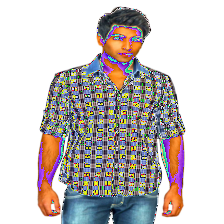

In [28]:
import torchvision
ex1 = data.__getitem__(0)['image']

to_img = torchvision.transforms.ToPILImage()

ex_img = to_img(ex1)

display(ex_img)


In [56]:
ex2 = Image.open(IMG_PATH + '40385.jpg')

processed_ex2 = data_transforms(ex2).reshape(1, 3, 224, 224)



tensor([[[[1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          ...,
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.]],

         [[1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          ...,
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.]],

         [[1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          ...,
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.]]]])

In [52]:
## Get inference result on single image
model = torch.jit.load('my_model_v1.pt')
res = []
with torch.no_grad():
    ## use .unsequeeze(0) for formatting
    ex1_output = model(ex1.unsqueeze(0))
    for idx, out in enumerate(ex1_output):
        ## get max indicies
        _, predicted = torch.max(ex1_output[out],1)
        res.append(predicted)

print(res)
print(inverse_translate_dicts[0][int(res[0])],inverse_translate_dicts[1][int(res[1])], inverse_translate_dicts[2][int(res[2])])


[tensor([2]), tensor([25]), tensor([11])]
Men Shirts Navy Blue


In [57]:
def process_img(img, transforms):


    processed = transforms(img).reshape(1, 3, 224, 224)
    return processed

def get_results_from_single_image(img):
    res = []
    with torch.no_grad():
        output = model(img)
        for idx, out in enumerate(output):
            _, predicted = torch.max(output[out],1)
            res.append(predicted)
    return res

print(get_results_from_single_image(processed_ex2))

[tensor([4]), tensor([33]), tensor([0])]


In [58]:
def parse_inf_result(res):
    to_return = []
    ## 3 labels
    for i in range(3):
        to_return.append(inverse_translate_dicts[i](int(res[i])))
    return to_return

print(parse_inf_result(res))

TypeError: 'dict' object is not callable

In [37]:
print(len(n_correct))

3
